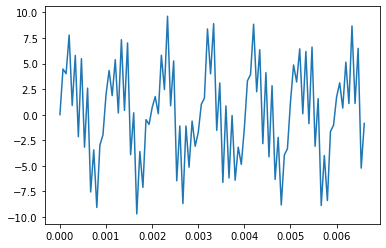

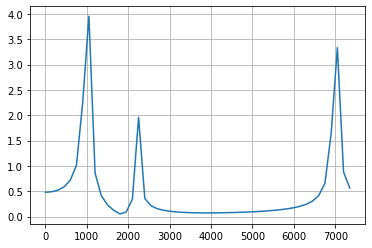

In [ ]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Number of sample points
N = 100 #liczba probek
# sample spacing
T = 1.0 / 15000.0 # okres probkowania

x = np.linspace(0.0, N*T, N, endpoint=False)
y = 5*np.sin(2*np.pi*1000*x)+2*np.sin(2*np.pi*2222*x)+4*np.sin(2*np.pi*7000*x)

plt.plot(x[:100], y[:100])
plt.show()

yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
def low_pass_filter(adata: np.ndarray, bandlimit: int = 3000, sampling_rate: int = 15000) -> np.ndarray:
        # translate bandlimit from Hz to dataindex according to sampling rate and data size
        bandlimit_index = int(bandlimit * adata.size / sampling_rate)
    
        fsig = np.fft.fft(adata)
        
        for i in range(bandlimit_index + 1, len(fsig) - bandlimit_index ):
            fsig[i] = 0
        
        adata_filtered = np.fft.ifft(fsig)
    
        return np.real(adata_filtered)

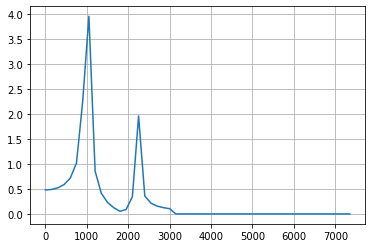

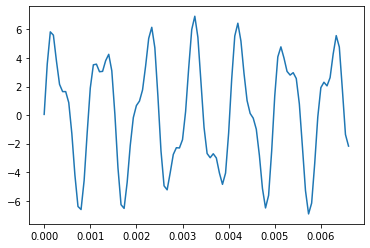

In [ ]:
from scipy.fftpack import ifft   
import librosa     
import librosa.display
import matplotlib.pyplot as plt

fsig = fft(y)
# apply low pass filter
bandlimit_index = int(3000 * y.size / 15000)
for i in range(bandlimit_index + 1, len(fsig) - bandlimit_index ):
  fsig[i] = 0


xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(fsig[0:N//2]))
plt.grid()
plt.show()

# inverse FFT
a = ifft(fsig).real

plt.plot(x[:100], a[:100])
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


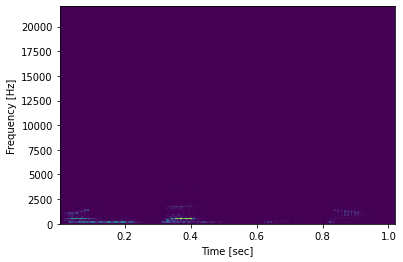

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('/content/drive/MyDrive/politechnika_mono.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

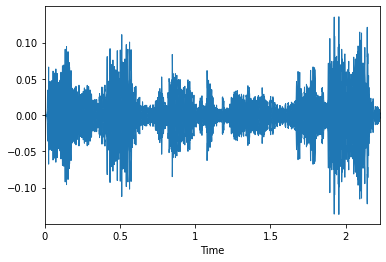

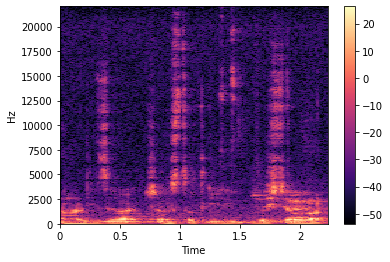

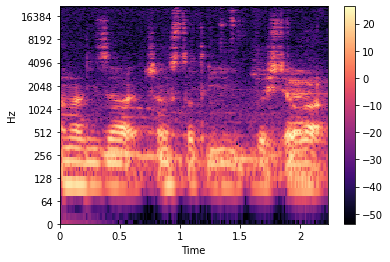

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

x, sr = librosa.load('/content/drive/MyDrive/analiza_czestotliwosciowa_mono.wav', sr=44100)

librosa.display.waveplot(x, sr=sr)
plt.show()

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

x, sr = librosa.load('/content/drive/MyDrive/politechnika_mono.wav', sr=44100)

librosa.display.waveplot(x, sr=sr)
plt.show()

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

<ipython-input-11-e65e95392aa5>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  img = np.array(ftimage,np.int32)


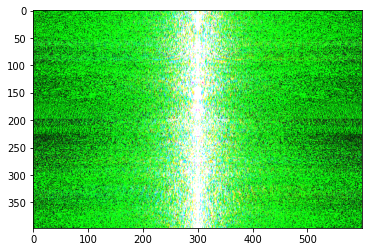

In [ ]:
import numpy as np
import pylab
from PIL import Image

image = Image.open('/content/opos.jpg')
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
# plt.imshow((image * 255).astype(np.uint8))
img = np.array(ftimage,np.int32)
pylab.imshow(np.abs(img))
pylab.show()

<ipython-input-13-cb8b35602d2e>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  img = np.array(ftimage,np.int32)


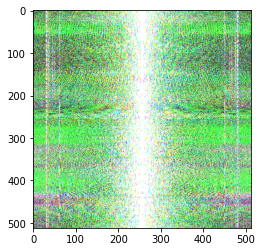

In [ ]:
image = Image.open('/content/PeppersRGB.tif')
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
# plt.imshow((image * 255).astype(np.uint8))
img = np.array(ftimage,np.int32)
pylab.imshow(np.abs(img))
pylab.show()

<ipython-input-14-4b652a8014d4>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  img = np.array(ftimage,np.int32)


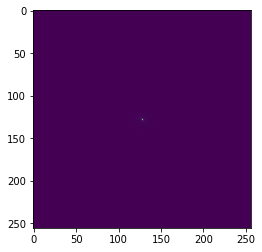

In [ ]:
image = Image.open('/content/Cameraman.tif')
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
img = np.array(ftimage,np.int32)
pylab.imshow(np.abs(img))
pylab.show()

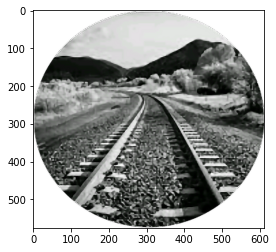

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('/content/kindpng_1727996.png').astype(float)
plt.figure()
plt.imshow(im, plt.cm.gray)

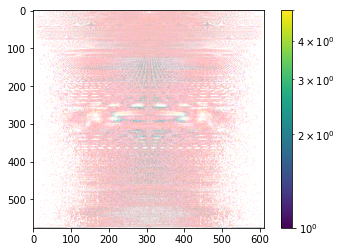

In [ ]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)

(576, 612, 4)


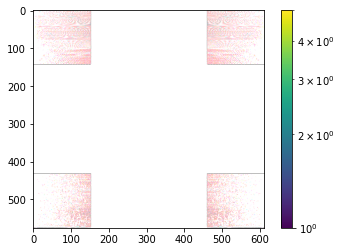

In [ ]:
frac = 0.25
transformed_image = im_fft.copy()
print(transformed_image.shape)
rows, columns, cos = transformed_image.shape
transformed_image[int(rows*frac):int(rows*(1-frac))] = 0
transformed_image[:, int(columns*frac):int(columns*(1-frac))] = 0

plt.figure()
plot_spectrum(transformed_image)

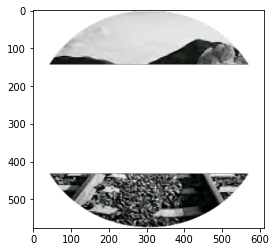

In [ ]:
reconstructed = fftpack.ifft2(transformed_image).real
plt.figure()
plt.imshow(reconstructed, plt.cm.gray)

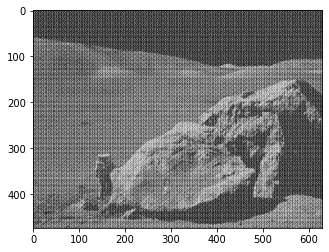

In [ ]:
im = plt.imread('/content/moonlanding.png').astype(float)
plt.figure()
plt.imshow(im, plt.cm.gray)

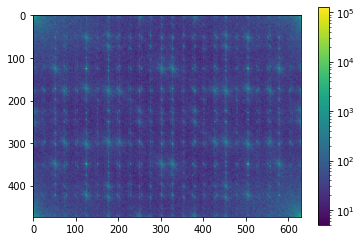

In [ ]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)

(474, 630)


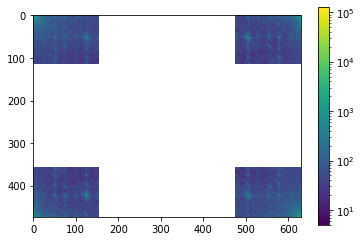

In [ ]:
frac = 0.25
transformed_image = im_fft.copy()
print(transformed_image.shape)
rows, columns = transformed_image.shape
transformed_image[int(rows*frac):int(rows*(1-frac))] = 0
transformed_image[:, int(columns*frac):int(columns*(1-frac))] = 0

plt.figure()
plot_spectrum(transformed_image)

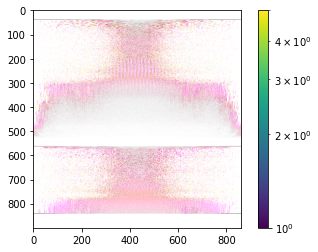

In [ ]:
im_fft = fftpack.fft2(im)
plt.figure()
plot_spectrum(im_fft)

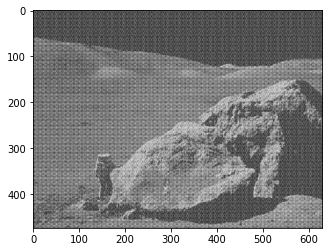

In [ ]:
reconstructed = fftpack.ifft2(transformed_image).real
plt.figure()
plt.imshow(reconstructed, plt.cm.gray)